# Multiclass Image Classifier
> Dataset terdiri dari tiga kelas gambar, yaitu panda, anjing, dan kucing

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 72 bytes


In [ ]:
!kaggle datasets download -d ashishsaxena2209/animal-image-datasetdog-cat-and-panda

 99% 373M/376M [00:05<00:00, 59.8MB/s]
100% 376M/376M [00:05<00:00, 67.4MB/s]


In [ ]:
import os
import zipfile

local_zip = '/content/animal-image-datasetdog-cat-and-panda.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!ls -l

total 384652
-rw-r--r-- 1 root root 393866738 Oct 16 02:07 animal-image-datasetdog-cat-and-panda.zip
drwxr-xr-x 7 root root      4096 Oct 16 02:08 animals
drwxr-xr-x 2 root root      4096 Oct 16 02:08 images
drwxr-xr-x 1 root root      4096 Oct 14 16:31 sample_data


In [ ]:
os.listdir('/content/animals/animals')

['cats', 'dogs', 'panda']

In [ ]:
print('total cats images :', len(os.listdir('/content/animals/animals/cats')))
print('total dogs images :', len(os.listdir('/content/animals/animals/dogs')))
print('total panda images :', len(os.listdir('/content/animals/animals/panda')))

total cats images : 1000
total dogs images : 1000
total panda images : 1000


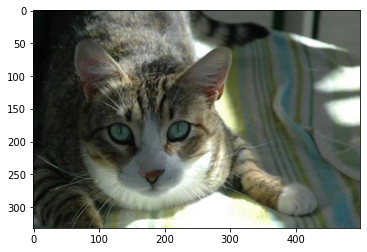

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
img = image.load_img('/content/animals/animals/cats/cats_00006.jpg')
imgplot = plt.imshow(img)

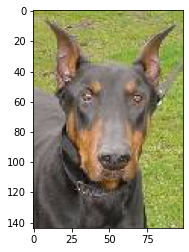

In [ ]:
img = image.load_img('/content/animals/animals/dogs/dogs_00621.jpg')
imgplot = plt.imshow(img)

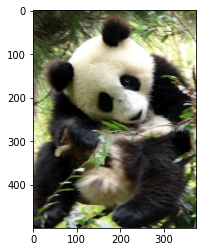

In [ ]:
img = image.load_img('/content/animals/animals/panda/panda_00016.jpg')
imgplot = plt.imshow(img)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = os.path.join('/content/animals/animals')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=128,
    class_mode='categorical',
    subset='training')
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=128,
    class_mode='categorical',
    subset='validation')

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (2,2), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Conv2D(32, (2,2), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(3, activation='softmax')  
])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
class callbackModel(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85 and logs.get('val_accuracy')>0.85):
      print("\nAkurasi telah mencapai >85%!")
      self.model.stop_training = True
callbacks_get = callbackModel()

In [ ]:
history = model.fit(train_generator, validation_data=validation_generator, batch_size=256, epochs=50, verbose=2, callbacks=[callbacks_get])

Epoch 1/50
19/19 - 42s - loss: 1.0928 - accuracy: 0.3692 - val_loss: 1.0770 - val_accuracy: 0.4883
Epoch 2/50
19/19 - 41s - loss: 0.9867 - accuracy: 0.4925 - val_loss: 0.8659 - val_accuracy: 0.5733
Epoch 3/50
19/19 - 42s - loss: 0.8315 - accuracy: 0.5663 - val_loss: 0.8123 - val_accuracy: 0.5767
Epoch 4/50
19/19 - 45s - loss: 0.7809 - accuracy: 0.6012 - val_loss: 0.7826 - val_accuracy: 0.5917
Epoch 5/50
19/19 - 41s - loss: 0.7553 - accuracy: 0.6000 - val_loss: 0.7479 - val_accuracy: 0.5967
Epoch 6/50
19/19 - 41s - loss: 0.7325 - accuracy: 0.6075 - val_loss: 0.7284 - val_accuracy: 0.6200
Epoch 7/50
19/19 - 42s - loss: 0.7144 - accuracy: 0.6150 - val_loss: 0.7193 - val_accuracy: 0.6083
Epoch 8/50
19/19 - 42s - loss: 0.6868 - accuracy: 0.6525 - val_loss: 0.7155 - val_accuracy: 0.6367
Epoch 9/50
19/19 - 42s - loss: 0.6762 - accuracy: 0.6479 - val_loss: 0.6979 - val_accuracy: 0.6333
Epoch 10/50
19/19 - 41s - loss: 0.6623 - accuracy: 0.6637 - val_loss: 0.6928 - val_accuracy: 0.6467
Epoch 11/

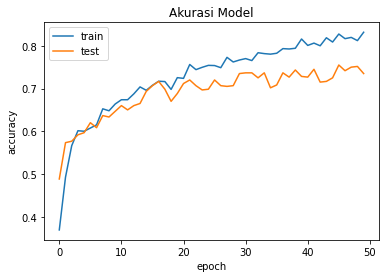

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

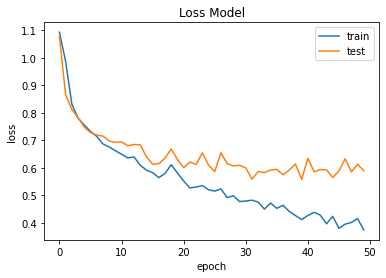

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()